## Лабораторна робота №4
### Обробка зображень та робота з наборами файлів цифрових зображень
#### Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.

#### Завдання 1. Робота з набором файлів.
1) Сформувати в папці на диску набір із 15 зображень різних форматів, розмірів та колірних моделей. Додати туди 2-3 файли, що не є зображеннями.
2) Створити функцію, що в якості аргумента приймає адресу папки на диску та повертає датафрейм з наступною інформацією про зображення, що знаходяться в папці:
- ім’я файлу;
- кольорову модель;
- формат;
- кількість каналів у зображенні;
- розмір файлу у мегабайтах байтах, округлених до двох знаків після коми;
- ширину картинки;
- висоту картинки;
- повний шлях до файлу;
- зменшене зображення.

,name,color model,format,channels,size (MB),width,height,full path,image
0,271533.jpg,RGB,JPEG,3,1.23,1920,1080,C:\Users\1007\images\271533.jpg,
1,271537.jpg,RGB,JPEG,3,0.34,1920,1080,C:\Users\1007\images\271537.jpg,
2,292624.jpg,RGB,JPEG,3,0.70,2560,1600,C:\Users\1007\images\292624.jpg,
3,54493.jpg,RGB,JPEG,3,1.21,1920,1200,C:\Users\1007\images\54493.jpg,
4,54494.jpg,RGB,JPEG,3,0.12,1920,1200,C:\Users\1007\images\54494.jpg,
5,595070.jpg,RGB,JPEG,3,0.33,1920,1080,C:\Users\1007\images\595070.jpg,
6,nod_poster1.jpg,RGB,JPEG,3,0.09,1000,1000,C:\Users\1007\images\nod_poster1.jpg,
7,nod_poster3.jpg,RGB,JPEG,3,0.13,1500,1000,C:\Users\1007\images\nod_poster3.jpg,

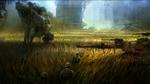
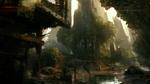
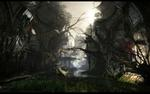
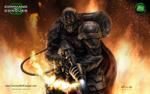
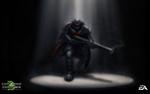
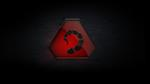
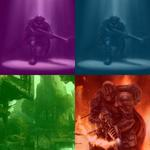
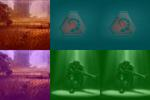

In [2]:
import os
import glob
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML

# Перетворення зображення в base64
def image_base64(image_path):
    with Image.open(image_path) as img:
        img.thumbnail((150, 150), Image.LANCZOS)  
        with BytesIO() as buffer:
            img.save(buffer, 'jpeg')  
            return base64.b64encode(buffer.getvalue()).decode()  

# Форматер для HTML
def image_formatter(image_path):
    return f'<img src="data:image/jpeg;base64,{image_base64(image_path)}" style="max-height:150px;max-width:150px;">'

def get_image_info(folder_path):
    if not os.path.isdir(folder_path):
        raise ValueError(f"Папка '{folder_path}' не знайдена.")
    
    image_data = []
    for file_path in glob.glob(os.path.join(folder_path, '*')):
        try:
            with Image.open(file_path) as img:
                file_info = {
                    "name": os.path.basename(file_path),
                    "color model": img.mode,
                    "format": img.format,
                    "channels": len(img.getbands()),
                    "size (MB)": round(os.path.getsize(file_path) / (1024 * 1024), 2),
                    "width": img.width,
                    "height": img.height,
                    "full path": os.path.abspath(file_path),
                    "image": file_path
                }
                image_data.append(file_info)
        except Exception:
            continue
    
    return pd.DataFrame(image_data)

folder_path = r"C:\Users\1007\images" 
df = get_image_info(folder_path)

HTML(df.to_html(escape=False, formatters={'image': image_formatter}))

#### Завдання 2.
Створити функцію, що в якості аргумента приймає:
- шлях до папки;
- назва вихідного зображення;
- кількість зображень в рядку;
- кількість зображень в стовпчику
і повертає зображення постера.
Вважаємо, що постер є прямокутним і число картинок в постері a x b, де а – число стовпчиків, а b – число рядків.

1) Створити функцію, що перетворює картинку на квадрат з максимально можливим розміром сторони (наприклад, якщо картинка розміром 800x533, то вихідний розмір повинен бути 533x533). Обрізаємо картинку з двох країв, тобто розмір розраховуємо від центру.
2) Всі картинки, з яких створено постер, повинні бути однакового розміру, Тобто після обрізки необхідно змінити розмір, наприклад, на 500x500.
3) Картинки для додавання в постер обирати випадковим чином. Картинки можуть повторюватись.
4) На картинку «накласти фільтр» червоного, зеленого, синього, жовтого, пурпурного або голубого кольорів, що також обираються випадковим чином та можуть повторюватись.
5) Надати 3-4 варіанти постерів, що збережено у файлах на диску.
6) Використовувати зображення, що знаходяться в папці, що сформована в завданні 1
7) Для обробки зображень використовувати бібліотеки Pillow та/або OpenCV.

Постер збережено у: C:\Users\1007\images\nod_poster3.jpg


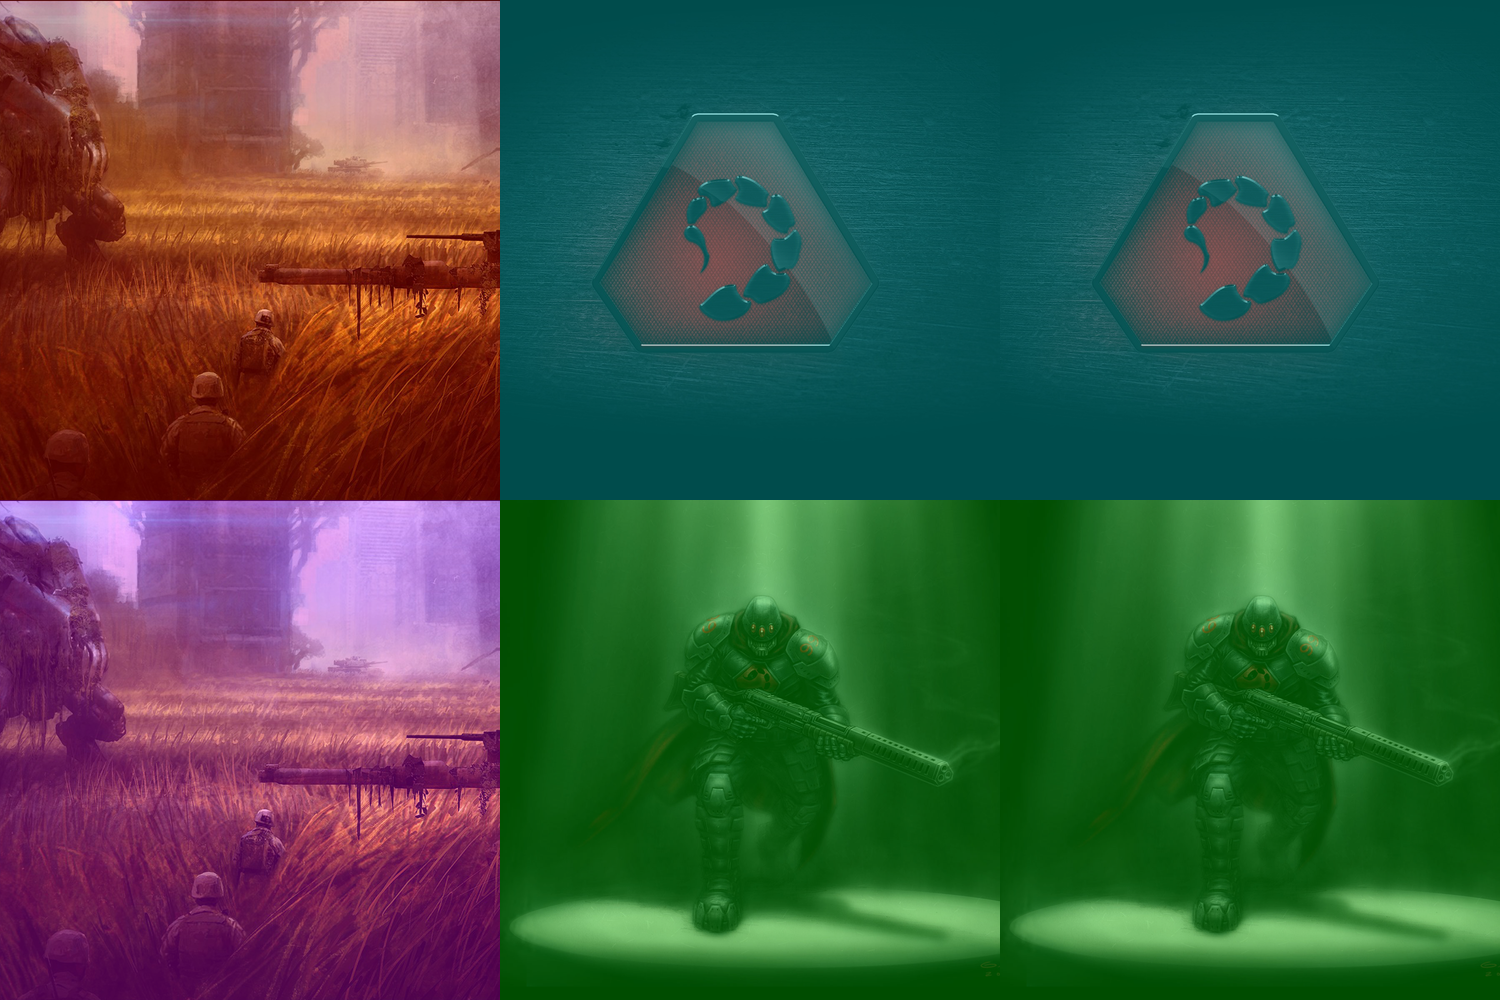

In [10]:
import os
import glob
import random
from PIL import Image

def crop_to_square(image):
    width, height = image.size
    side = min(width, height)
    left = (width - side) // 2
    top = (height - side) // 2
    right = left + side
    bottom = top + side
    return image.crop((left, top, right, bottom))

def apply_color_filter(image, color):
    overlay = Image.new('RGB', image.size, color)
    return Image.blend(image, overlay, alpha=0.3)

def create_poster(folder_path, output_image_name, images_in_row, images_in_column):
    if not os.path.isdir(folder_path):
        raise ValueError(f"Папка '{folder_path}' не знайдена.")
    
    image_size = 500  # 500x500 пікселів
    
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
    image_paths = [f for f in glob.glob(os.path.join(folder_path, '*')) if os.path.isfile(f) and f.lower().endswith(valid_extensions)]
    if not image_paths:
        raise ValueError("У папці немає доступних зображень.")
    
    # Створюємо порожній постер
    poster_width = images_in_row * image_size
    poster_height = images_in_column * image_size
    poster = Image.new('RGB', (poster_width, poster_height), 'white')
    
    # Випадкові кольори для фільтрів
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255)]
    
    for i in range(images_in_column):
        for j in range(images_in_row):
            random_image_path = random.choice(image_paths)
            with Image.open(random_image_path) as img:
                img = crop_to_square(img)
                img = img.resize((image_size, image_size), Image.LANCZOS)
                color = random.choice(colors)
                img = apply_color_filter(img, color)
                x_offset = j * image_size
                y_offset = i * image_size
                poster.paste(img, (x_offset, y_offset))
    
    if output_image_name:
        output_path = os.path.join(folder_path, output_image_name)
        poster.save(output_path)
        print(f"Постер збережено у: {output_path}")
    
    return poster

folder_path = r"C:\Users\1007\images" 
output_image_name = "nod_poster3.jpg"    
images_in_row = 3
images_in_column = 2

poster = create_poster(folder_path, output_image_name, images_in_row, images_in_column)

display(poster)

Постер збережено у: C:\Users\1007\images\nod_poster1.jpg


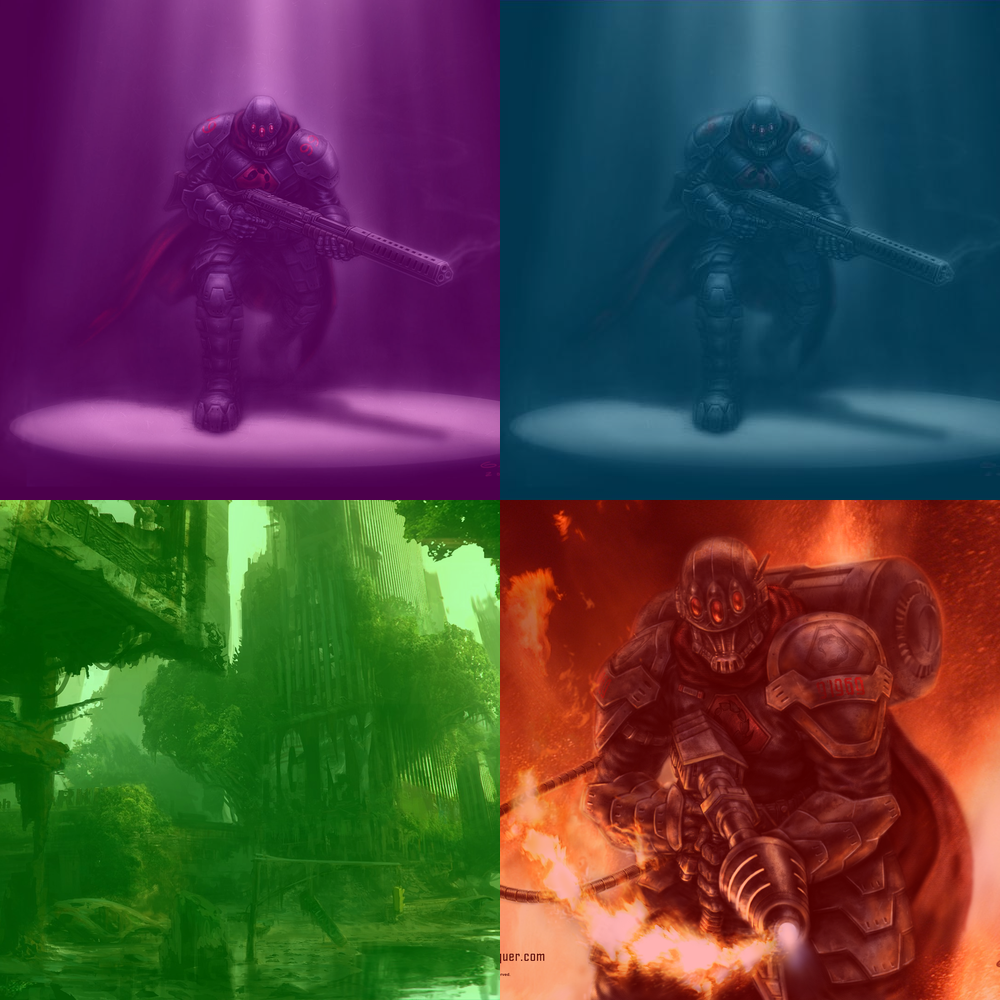

In [11]:
folder_path = r"C:\Users\1007\images"  
output_image_name = "nod_poster1.jpg"    
images_in_row = 2
images_in_column = 2

poster = create_poster(folder_path, output_image_name, images_in_row, images_in_column)

display(poster)